In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
movie = pd.read_csv("../Resources/US_movies_cleanup.csv")
#drop un-needed columns
movie_meta1 = movie.drop(columns=["Unnamed: 0","Title","Runtime (mins)","Year","Release Date","Num Votes",
                                 "Rotten Tomatoes Rating","IMDb Rating","Genre","Rated","Production",
                                 "Director","Actor"], axis=1)

#drop rows with no values
rating_meta = movie_meta1.dropna()
rating_meta.head(10)

,Metascore,Box Office
1,53.0,"$183,277,573"
4,87.0,"$2,925,880"
8,68.0,"$45,299,680"
9,83.0,"$94,240,635"
16,51.0,"$431,000,000"
18,64.0,"$156,164,829"
19,64.0,"$317,557,891"
20,92.0,"$314,000,000"
21,87.0,"$339,700,000"
22,48.0,"$141,134,092"


In [3]:
#create Metacritic data frame of "Good" movies
meta_good = rating_meta[(rating_meta["Metascore"]>=70)]
#meta_good.head(10)
meta_goodbox = meta_good.drop(["Metascore"], axis=1)
#meta_goodbox.head(10)

#remove currency symboal and convert box-office to float
clean_metagood = meta_goodbox["Box Office"].replace('[\$,]', '', regex=True).astype(float)
clean_metagood.head(10)

4       2925880.0
9      94240635.0
20    314000000.0
21    339700000.0
23    380529370.0
24    364000000.0
29    204100000.0
30    132300000.0
33    167007184.0
35    533316061.0
Name: Box Office, dtype: float64

In [4]:
#create Metacritic data frame of "Not Good" movies
meta_notgood = rating_meta[(rating_meta["Metascore"]<70)]
#meta_notgood.head()
meta_badbox = meta_notgood.drop(["Metascore"], axis=1)
meta_badbox.head(10)

clean_metabad = meta_badbox["Box Office"].replace('[\$,]', '', regex=True).astype(float)
clean_metabad.head(10)

1     183277573.0
8      45299680.0
16    431000000.0
18    156164829.0
19    317557891.0
22    141134092.0
25     84136909.0
26     85974306.0
31     53100000.0
32     70500000.0
Name: Box Office, dtype: float64

In [5]:
#compare the 2 groups T-test

(t_stat, p) = stats.ttest_ind(clean_metagood, clean_metabad, equal_var=False)

print(clean_metagood.mean())
print(clean_metabad.mean())

print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

66744160.12692308
44066734.20817036
t-statistics is 4.525367237287527.
p-value is 7.281365714175035e-06.


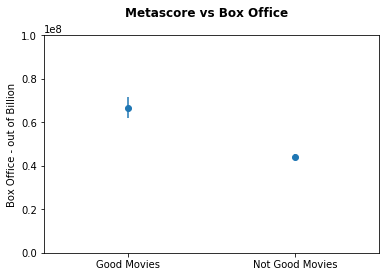

In [6]:
# Plot sample means with error bars
tick_labels = ["Good Movies", "Not Good Movies"]

means = [clean_metagood.mean(), clean_metabad.mean()]
x_axis = np.arange(0, len(means))

sem = [clean_metagood.sem(), clean_metabad.sem()]

# Plot mean height of players
fig, ax = plt.subplots()

fig.suptitle("Metascore vs Box Office",
             fontsize=12, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 100000000)

ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Box Office - out of Billion")

plt.show()

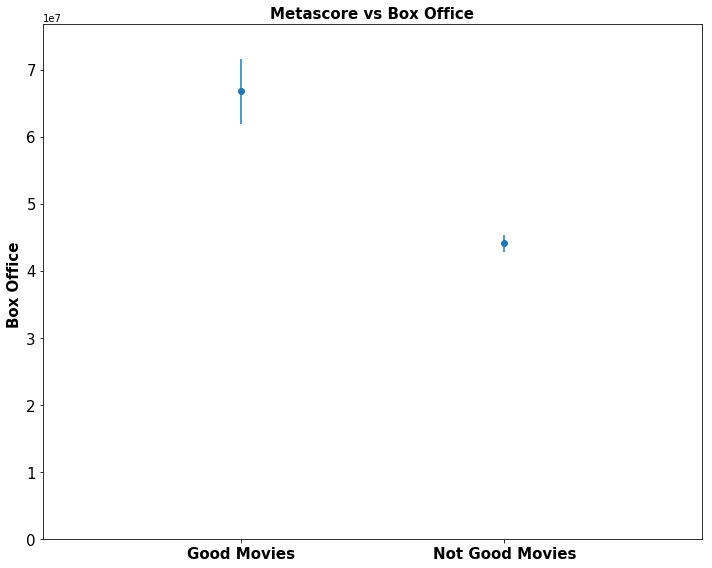

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))


boxoffice_mean = [66744160, 44066734]
x_axis = np.arange(len(boxoffice_mean))
sem = [clean_metagood.sem(), clean_metabad.sem()]
ax.errorbar(x_axis, means, yerr=sem, fmt="o")

# plt.bar(x_axis, boxoffice_mean, color='g', alpha=0.8, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Good Movies", "Not Good Movies"], size=15, weight="bold")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(boxoffice_mean)+10000000)

# Give our chart some labels and a tile
plt.title("Metascore vs Box Office",size=15, weight="bold")
plt.ylabel("Box Office ", size=15, weight="bold")

plt.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig("../Figures/Metascore_BoxOffice.png")
plt.show()